# Табличные данные и взаимодействие с Excel

## Лабораторная работа 4

1. При помощи пакета `xlsxwriter` создайте рабочую книгу под названием `recipes_model.xlsx`. 
Добавьте лист с названием "Модель". В первой строчке листа разместите следующие названия колонок: `"Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"`.

* Не закрывайте рабочую книгу, она потребуется для выполнения следующего задания.

In [3]:
workbook = xlsxwriter.Workbook('recipes_model.xlsx')
worksheet = workbook.add_worksheet('Модель')

data = ["Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", 
        "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"]

for col_num, col in enumerate(data):
    worksheet.write(0, col_num, col)  

2. При помощи пакета `xlsxwriter` добавьте условное форматирование на лист "Модель":
* если в ячейке столбца `G` указано значение "PK", то сделать заливку ячейки цвета  `#006600`, а цвет шрифта - `#fffff`.
* если в ячейке столбца `G` указано значение "FK", то сделать заливку ячейки цвета  `#cccc00`, а цвет шрифта - `#000000`.

Примените данные правила к диапазону `G2:G50`. Закройте рабочую книгу.

In [4]:
format1 = workbook.add_format({'bg_color': '#006600', 
                               'font_color': '#fffff'})
worksheet.conditional_format('G2:G50', {'type':     'cell',
                                        'criteria': '==',
                                        'value':    '"PK"',
                                        'format':   format1})


format2 = workbook.add_format({'bg_color': '#cccc00', 
                               'font_color': '#000000'})
worksheet.conditional_format('G2:G50', {'type':     'cell',
                                        'criteria': '==',
                                        'value':    '"FK"',
                                        'format':   format2})

workbook.close()

3. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [5]:
with open(
    'recipes_model.csv',
    encoding = 'utf8'
) as fp:
    reader = csv.reader(fp, delimiter = '\t')

    data = list(reader)
    
workbook = xw.Book('recipes_model.xlsx')
worksheet = workbook.sheets['Модель']
        
worksheet.range("A2").value = data

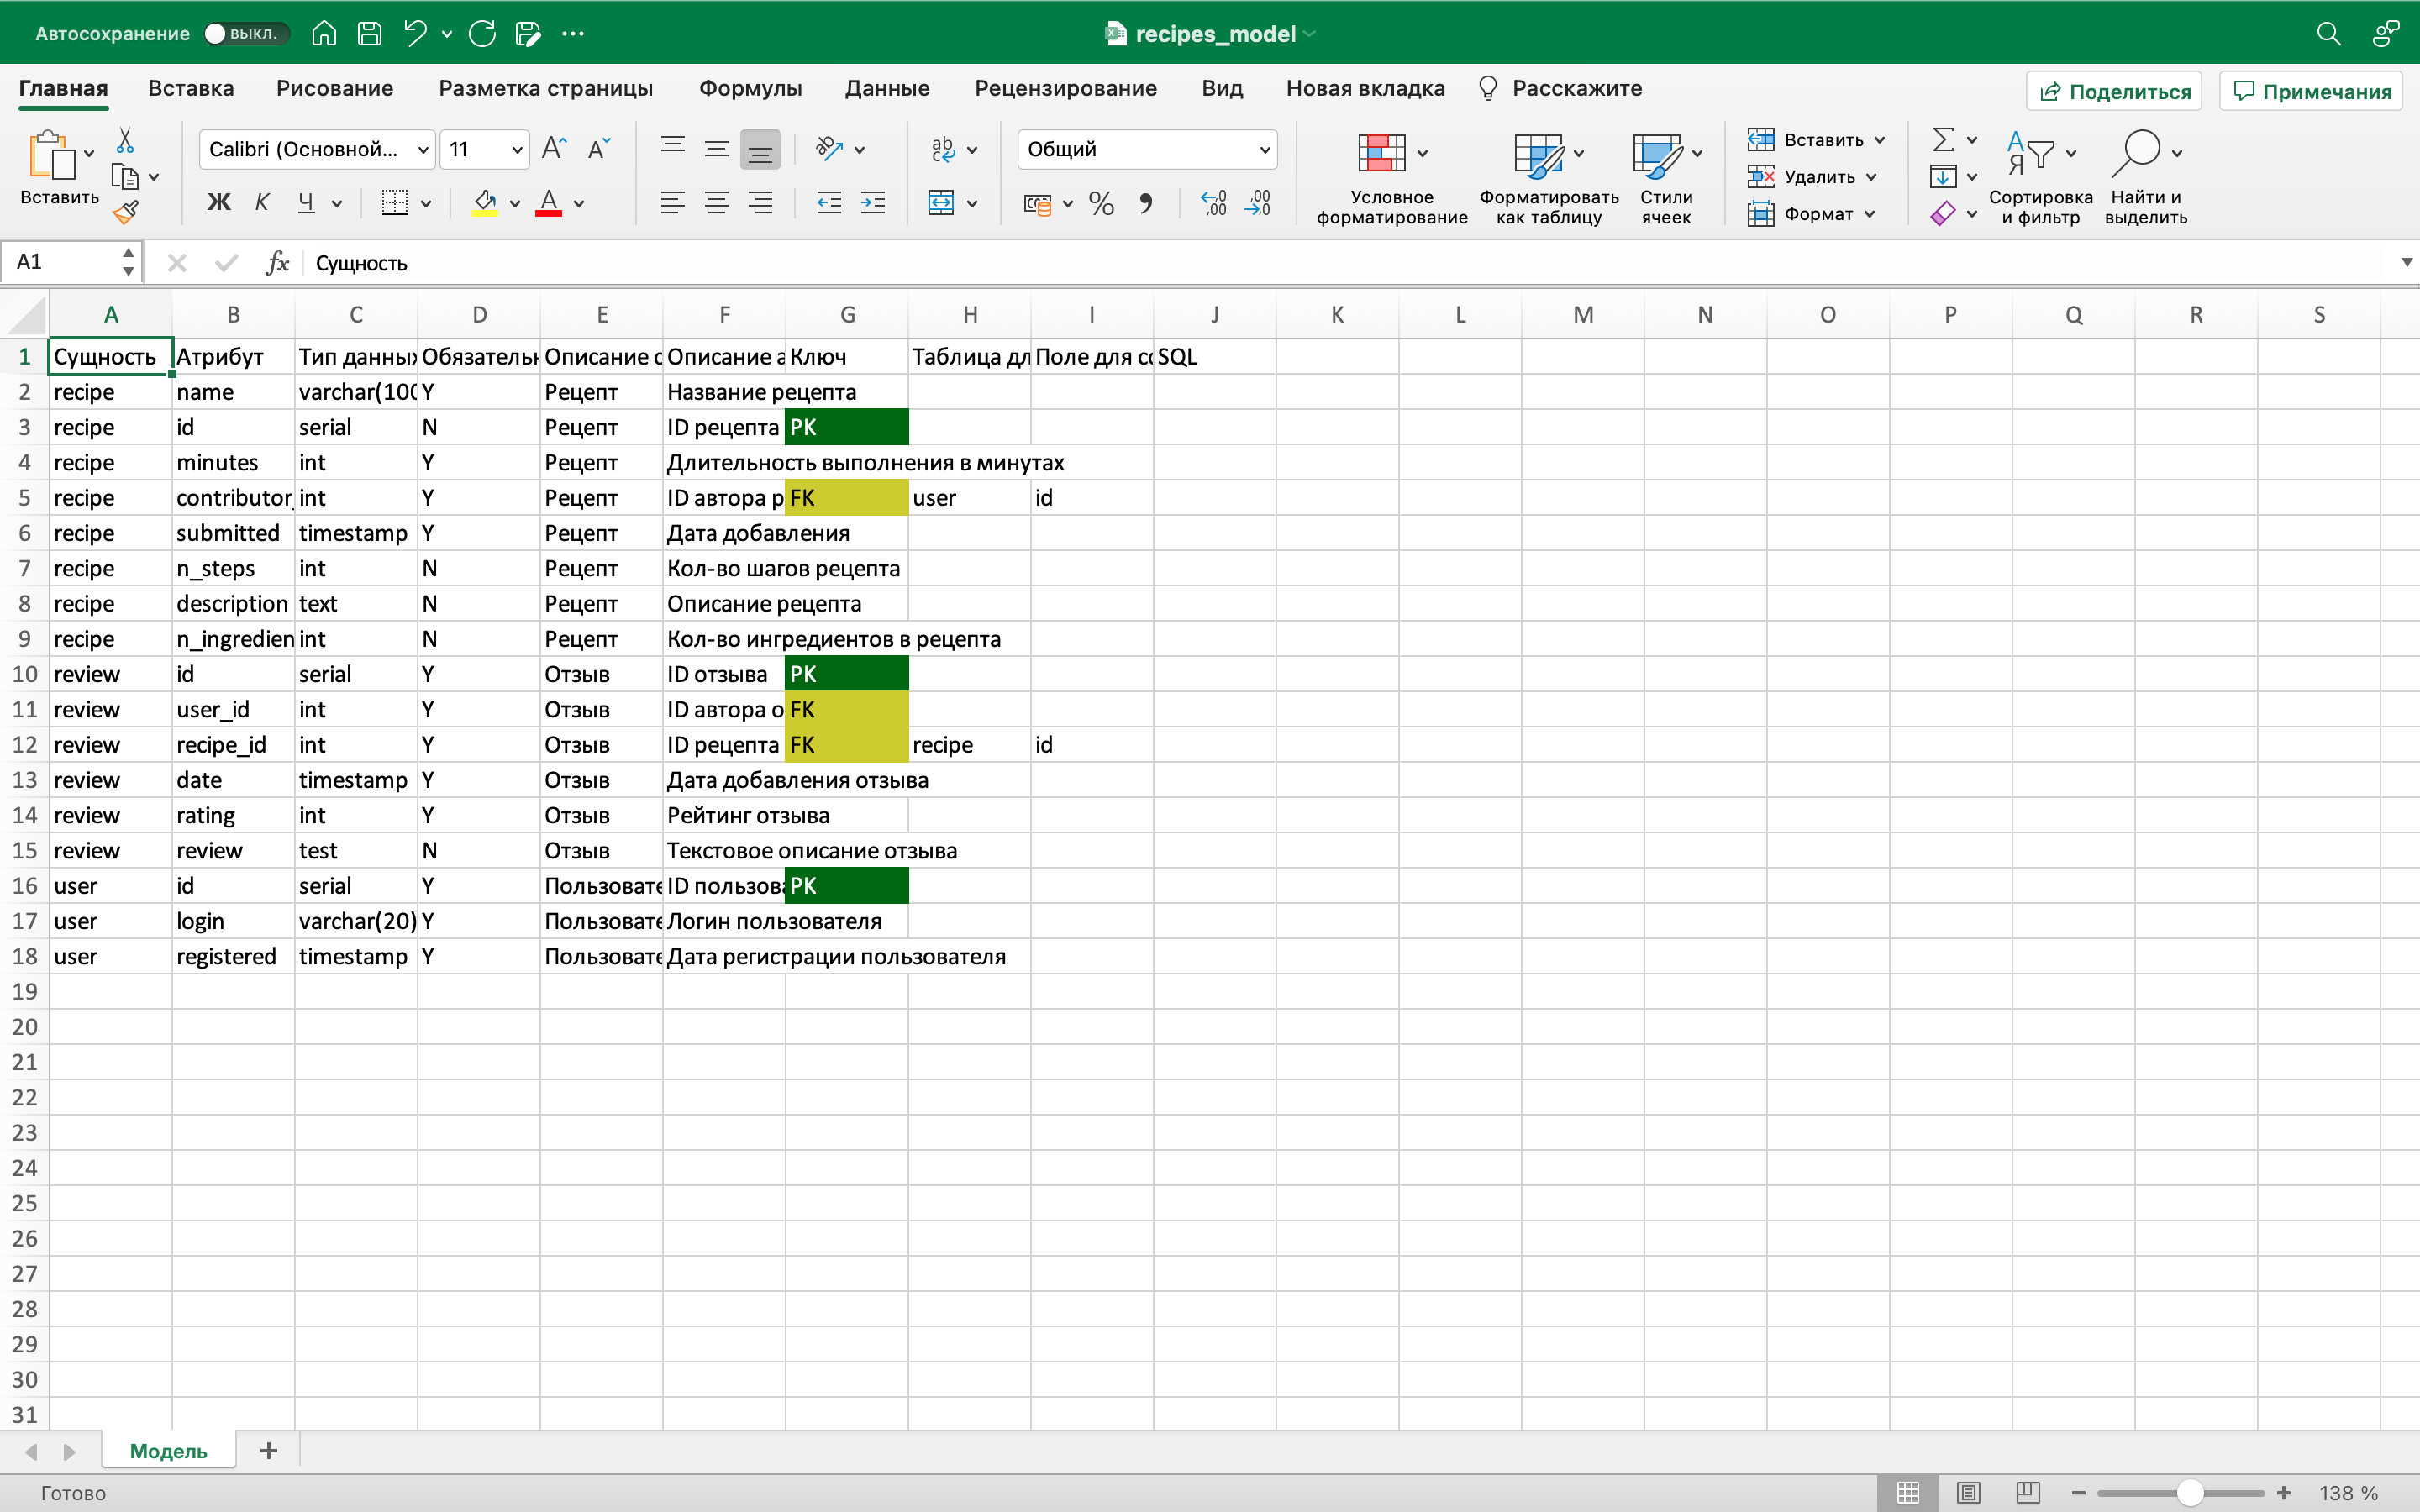

4. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [6]:
worksheet.range("J2:J18").formula = '''=CONCATENATE(B2," ",UPPER(C2),IF(G2="PK"," PRIMARY KEY",IF(G2="FK", 
CONCATENATE(" REFERENCES ",H2,"(",I2,")"),"")),IF(AND(D2="Y",G2<>"PK")," NOT NULL",""))'''

In [191]:
from PIL import ImageGrab
from IPython.display import display, Image

def ins(ratio=1.0):
    im_data = ImageGrab.grabclipboard()
    new_size = tuple([int(i*ratio) for i in im_data.size])
    thumb = im_data.resize(new_size)
    fn = "temp.PNG"
    thumb.save(fn)
    img = Image(filename=fn)
    display(img)

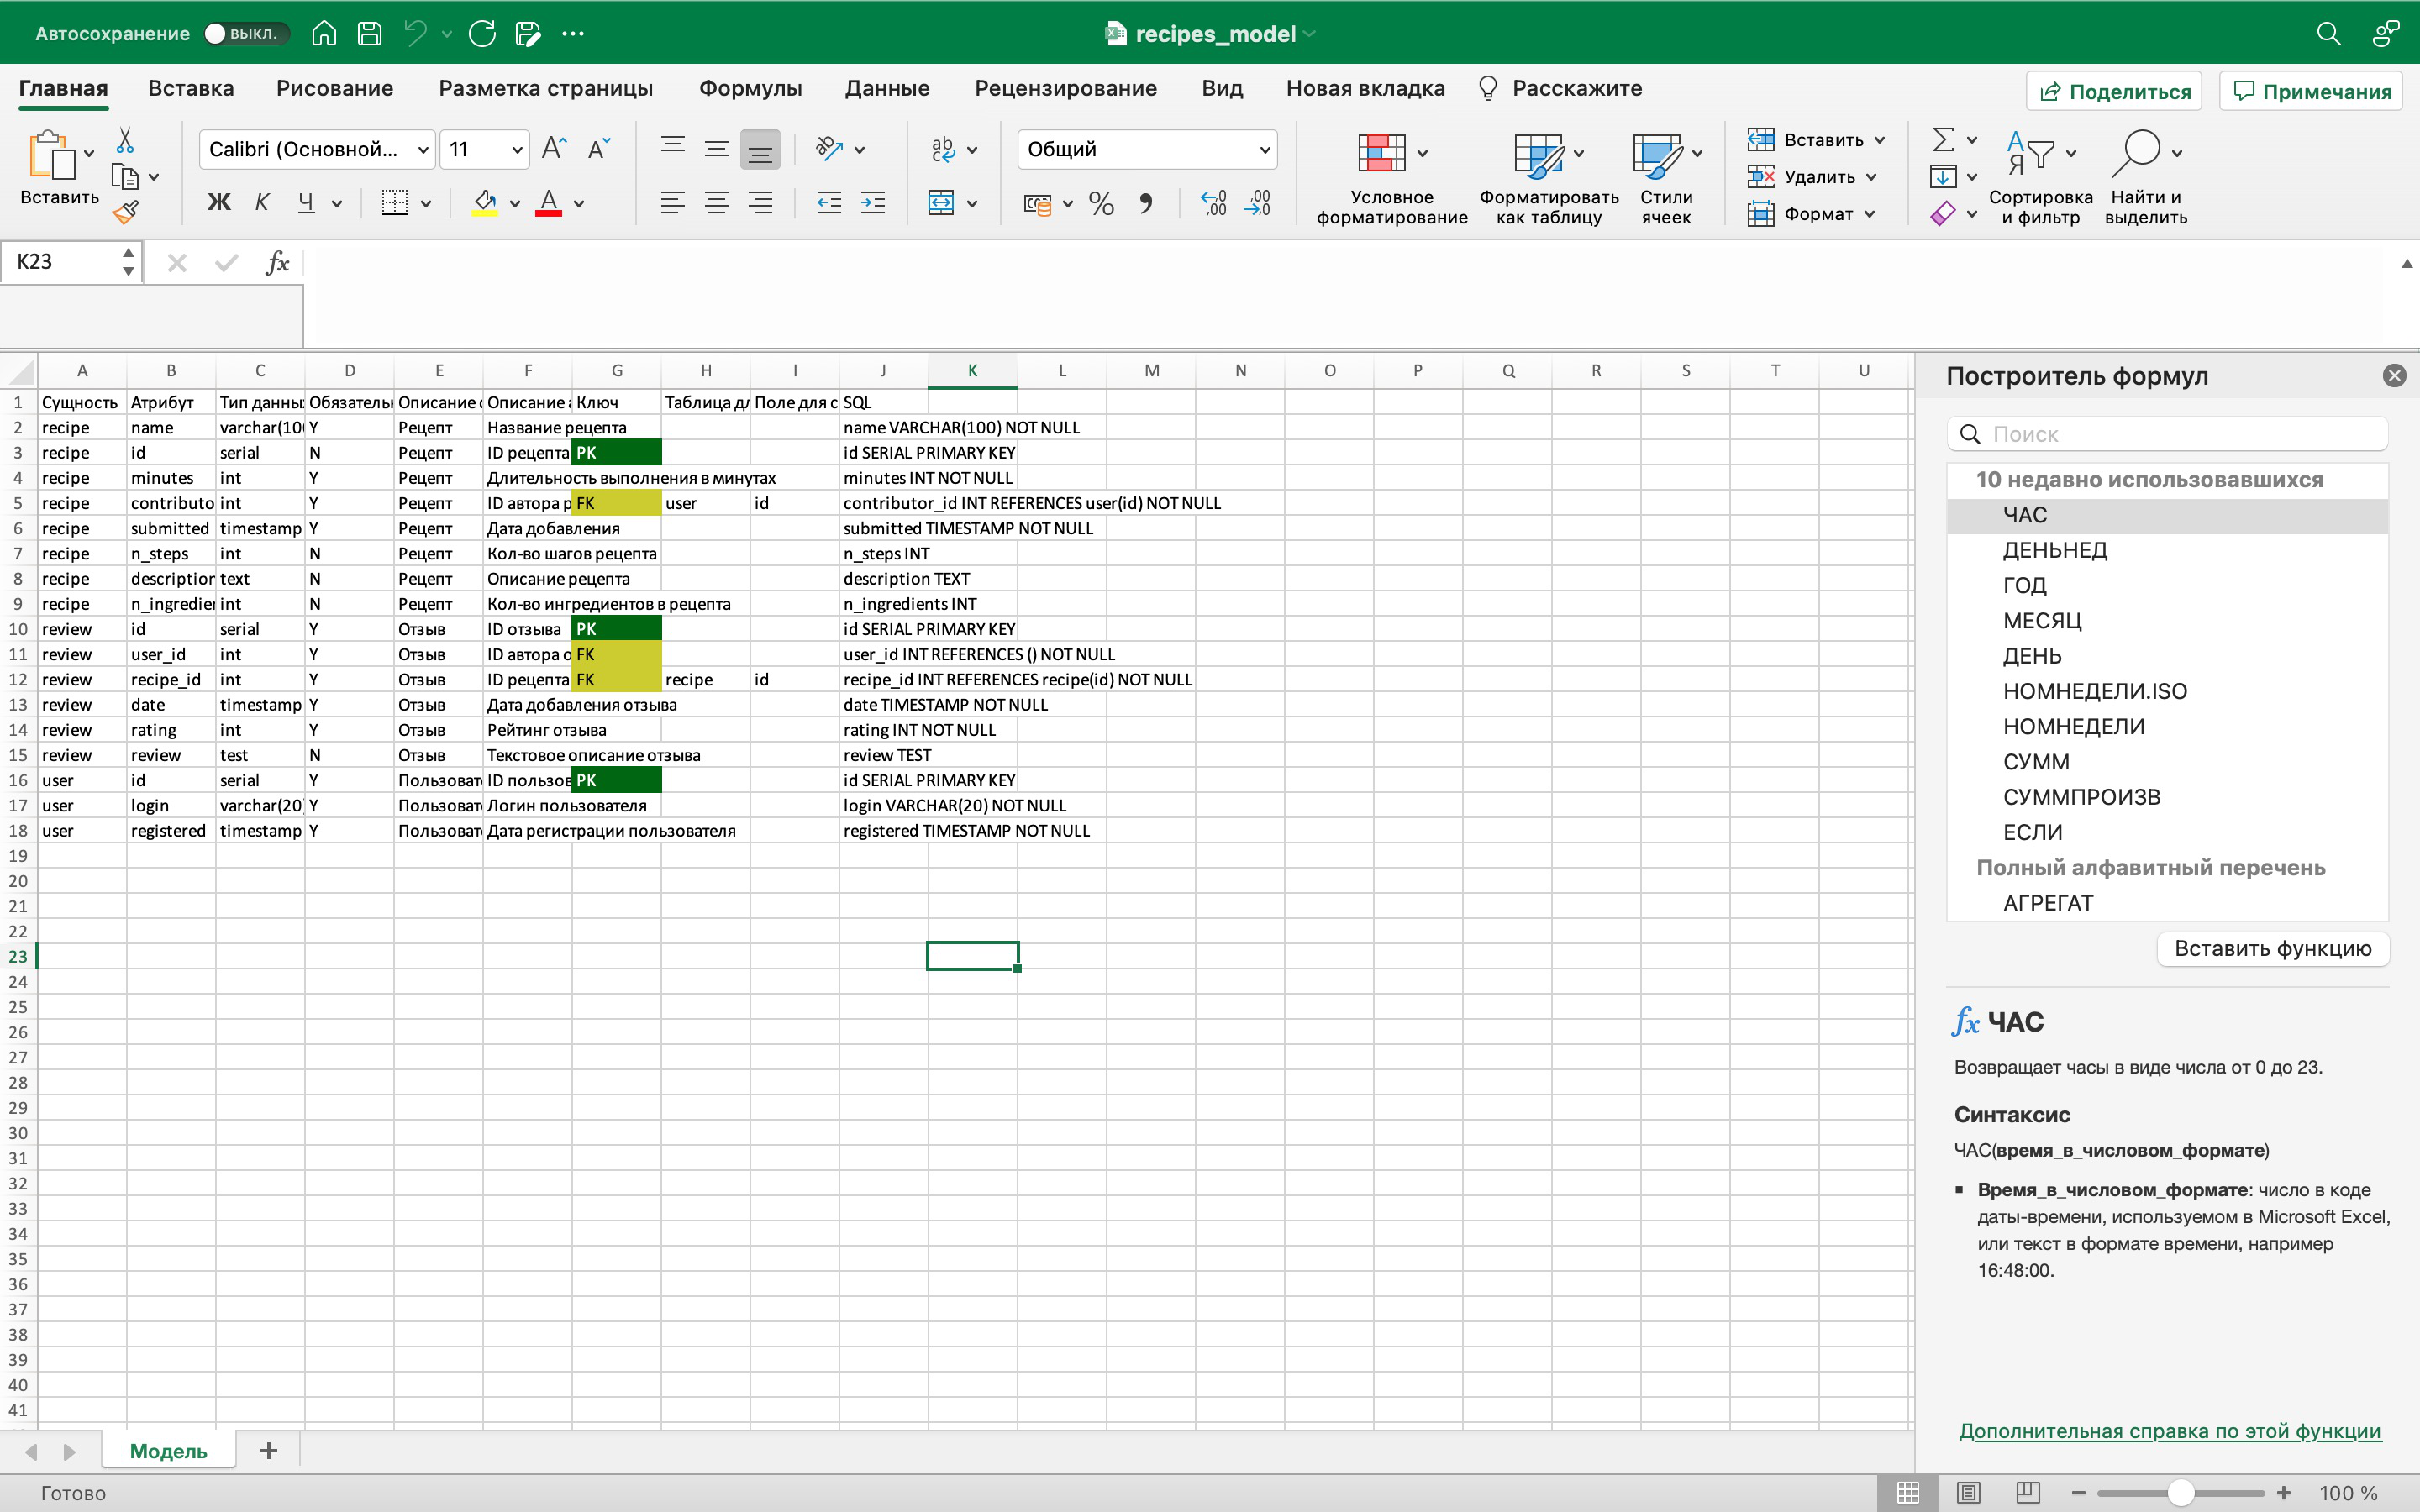

In [43]:
ins(1)

5. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [7]:
worksheet.range("A1:J1").color = '#00ccff'

In [8]:
worksheet.range('A1:J18').columns.autofit()

In [9]:
worksheet.range("A1:J1").api.font_object.font_style.set('bold')

In [10]:
worksheet.tables.add(worksheet.range('A1:J18'), name = 'table_1')
worksheet.tables['table_1'].show_autofilter = True

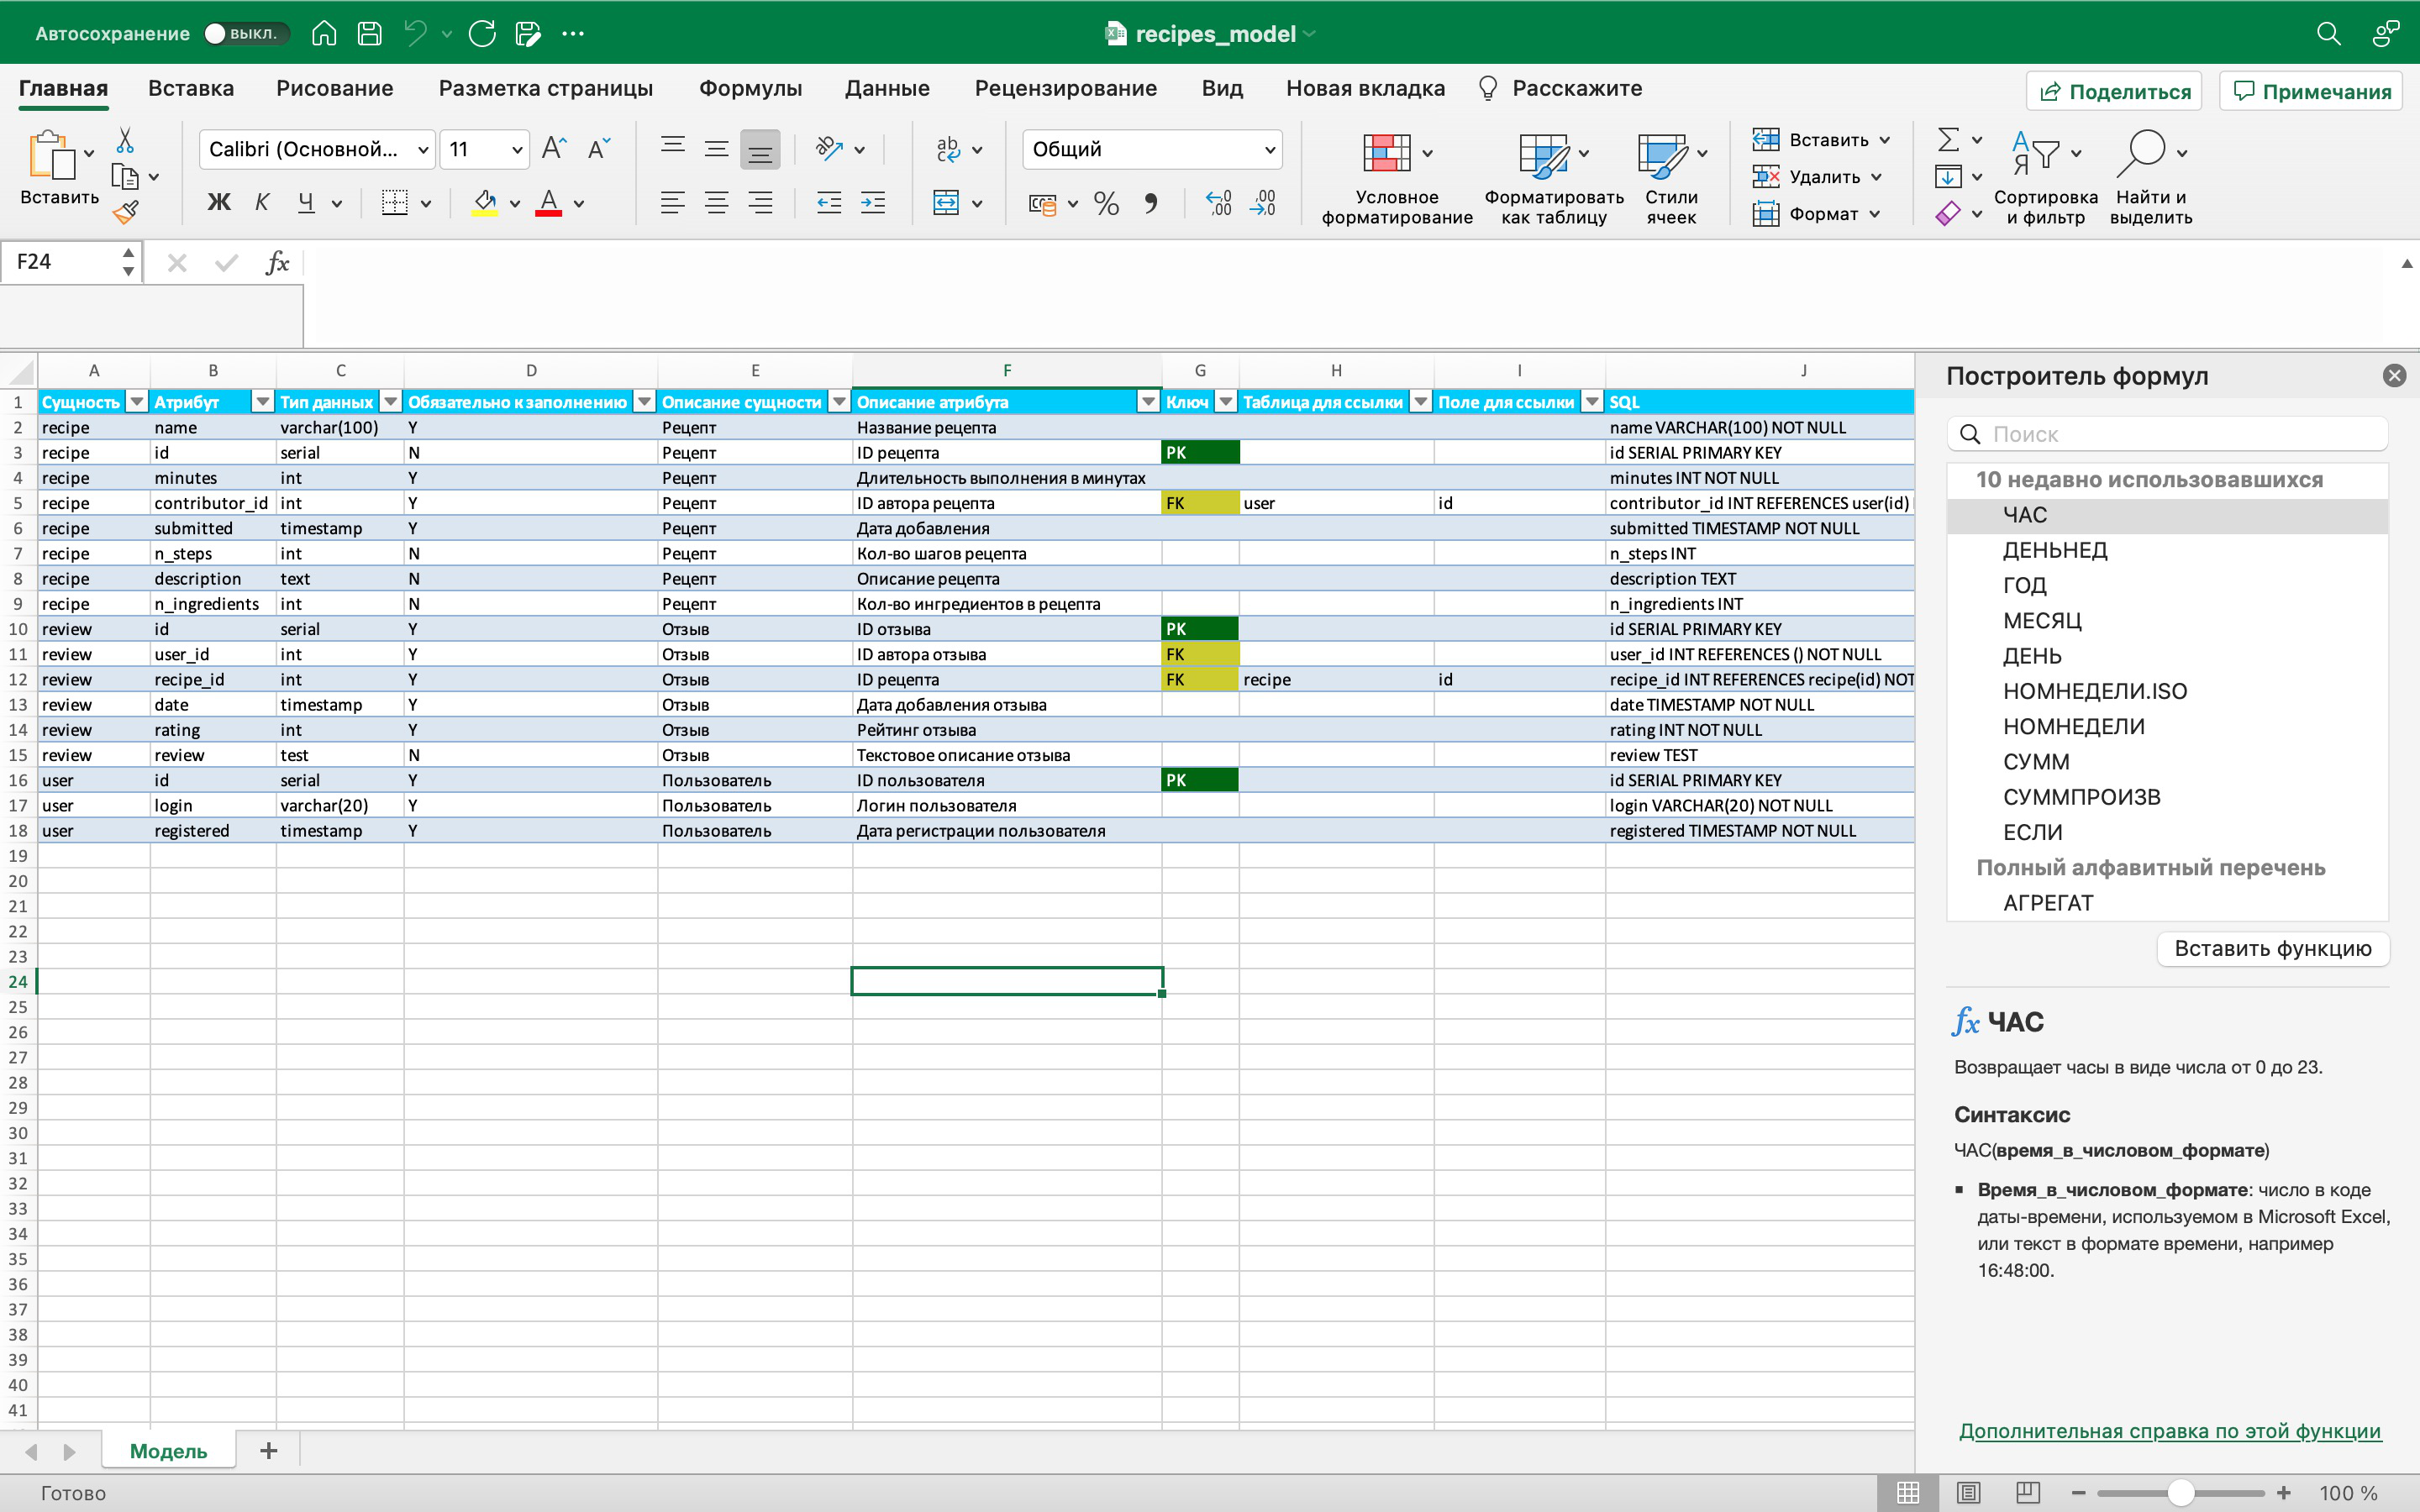

In [72]:
ins(1)

6. В данных, полученных из файла `recipes_model.csv`, имеются ошибки двух видов:

    1\. Для некоторых полей, указанных как первичный ключ, в столбце "Обязательно к заполнению" стоит значение "N";

    2\. Для некоторых полей, указанных как внешний ключ, не указана таблица для ссылки и поле для ссылки.

Получите данные из листа в виде `pd.DataFrame`. Найдите строки на листе, которые содержат ошибки первого или второго рода и сделайте заливку эти строк цвета `(255, 102, 102)`. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [11]:
recipes_model = worksheet.range('A1:J18').options(pd.DataFrame).value.reset_index()

In [12]:
type(recipes_model)

pandas.core.frame.DataFrame

In [13]:
recipes_model.head()

Сущность         Атрибут    Тип данных Обязательно к заполнению  \
0   recipe            name  varchar(100)                        Y   
1   recipe              id        serial                        N   
2   recipe         minutes           int                        Y   
3   recipe  contributor_id           int                        Y   
4   recipe       submitted     timestamp                        Y   

  Описание сущности                  Описание атрибута  Ключ  \
0            Рецепт                   Название рецепта  None   
1            Рецепт                         ID рецепта    PK   
2            Рецепт  Длительность выполнения в минутах  None   
3            Рецепт                  ID автора рецепта    FK   
4            Рецепт                    Дата добавления  None   

  Таблица для ссылки Поле для ссылки  \
0               None            None   
1               None            None   
2               None            None   
3               user              id   
4               None            None   

                                               SQL  
0                       name VARCHAR(100) NOT NULL  
1                            id SERIAL PRIMARY KEY  
2                             minutes INT NOT NULL  
3  contributor_id INT REFERENCES user(id) NOT NULL  
4                     submitted TIMESTAMP NOT NULL

In [14]:
error1 = recipes_model[(recipes_model.Ключ == 'PK') & (recipes_model['Обязательно к заполнению'] == 'N')].index[0]

In [19]:
recipes_model[(recipes_model.Ключ == 'PK') & (recipes_model['Обязательно к заполнению'] == 'N')].index.tolist()

[1]

In [140]:
error2 = recipes_model[(recipes_model.Ключ == 'FK') & (recipes_model['Таблица для ссылки'].isna()) & 
              (recipes_model['Поле для ссылки'].isna())].index[0]

In [144]:
error = []
error.append(error1)
error.append(error2)

In [147]:
error

[1, 9]

In [205]:
for i in error:
    worksheet.range('A' + str(i + 2) + ':J' + str(i + 2)).color = (255, 102, 102)

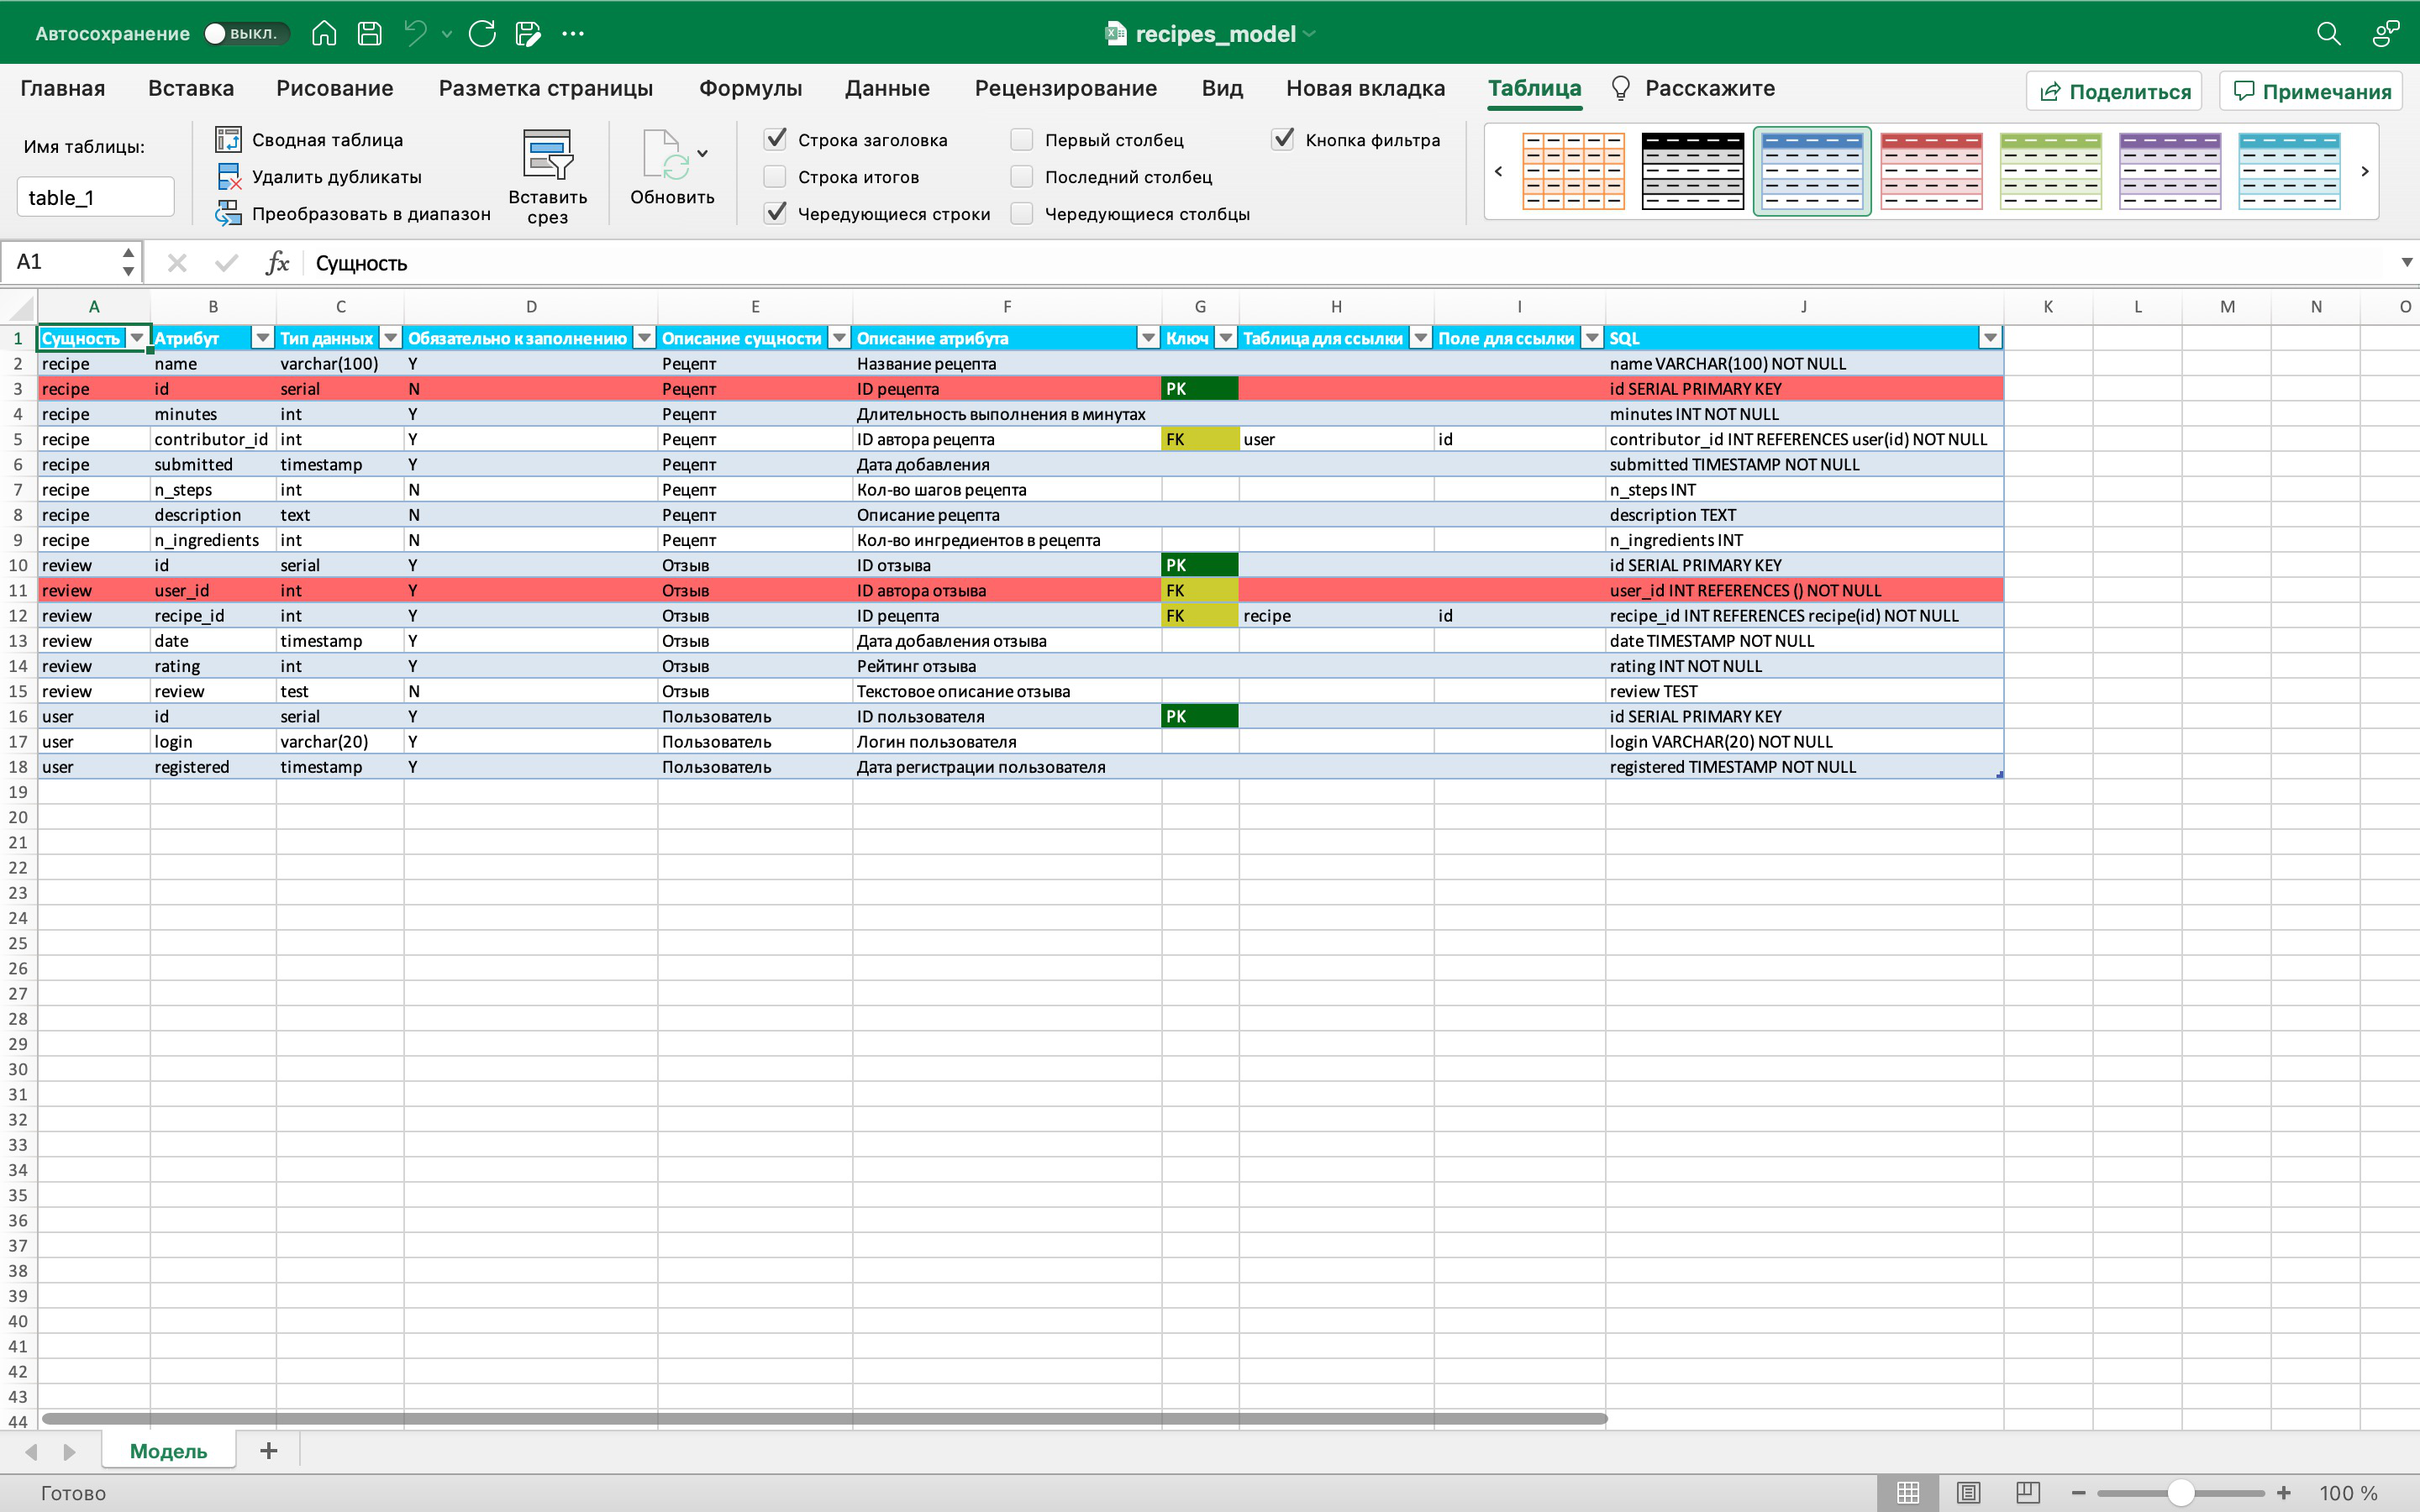

In [168]:
ins(1)

7. При помощи пакета `xlwings` создайте лист с названием `Ошибки заполнения`. 

Поместите в первой строчке этого листа заголовки "№ строки" и "Ошибка". Заполните лист на основе решения задачи 6. В столбце "№ строки" укажите номер строки с листа `Модель`, содержащую ошибку, а в столбце "Ошибка" для ошибок первого рода напишите сообщение "Первичный ключ не может быть NULL", для ошибок второго рода - "Не указано поле для связи по внешнему ключу". Сделайте скриншот состояния листа `Ошибки заполнения` и прикрепите в ячейку ноутбука. 

In [206]:
workbook.sheets.add('Ошибки заполнения')
worksheet_error = workbook.sheets['Ошибки заполнения']

In [207]:
cols_error = ['№ строки', 'Ошибка']
worksheet_error.range('A1').value = cols_error

In [180]:
error1_ = []
error1_.append(error1)

error1_mess = []
for i in error1_:
    error1_mess.append('Первичный ключ не может быть NULL')
    
error2_ = []
error2_.append(error2)

error2_mess = []
for i in error2_:
    error2_mess.append('Не указано поле для связи по внешнему ключу')
    
error_mess = error1_mess + error2_mess

In [208]:
error, error_mess

([1, 9],
 ['Первичный ключ не может быть NULL',
  'Не указано поле для связи по внешнему ключу'])

In [240]:
worksheet_error.range('A2').value = (np.array(error) + 2)[:, np.newaxis]
worksheet_error.range('B2').value = np.array(error_mess)[:, np.newaxis]

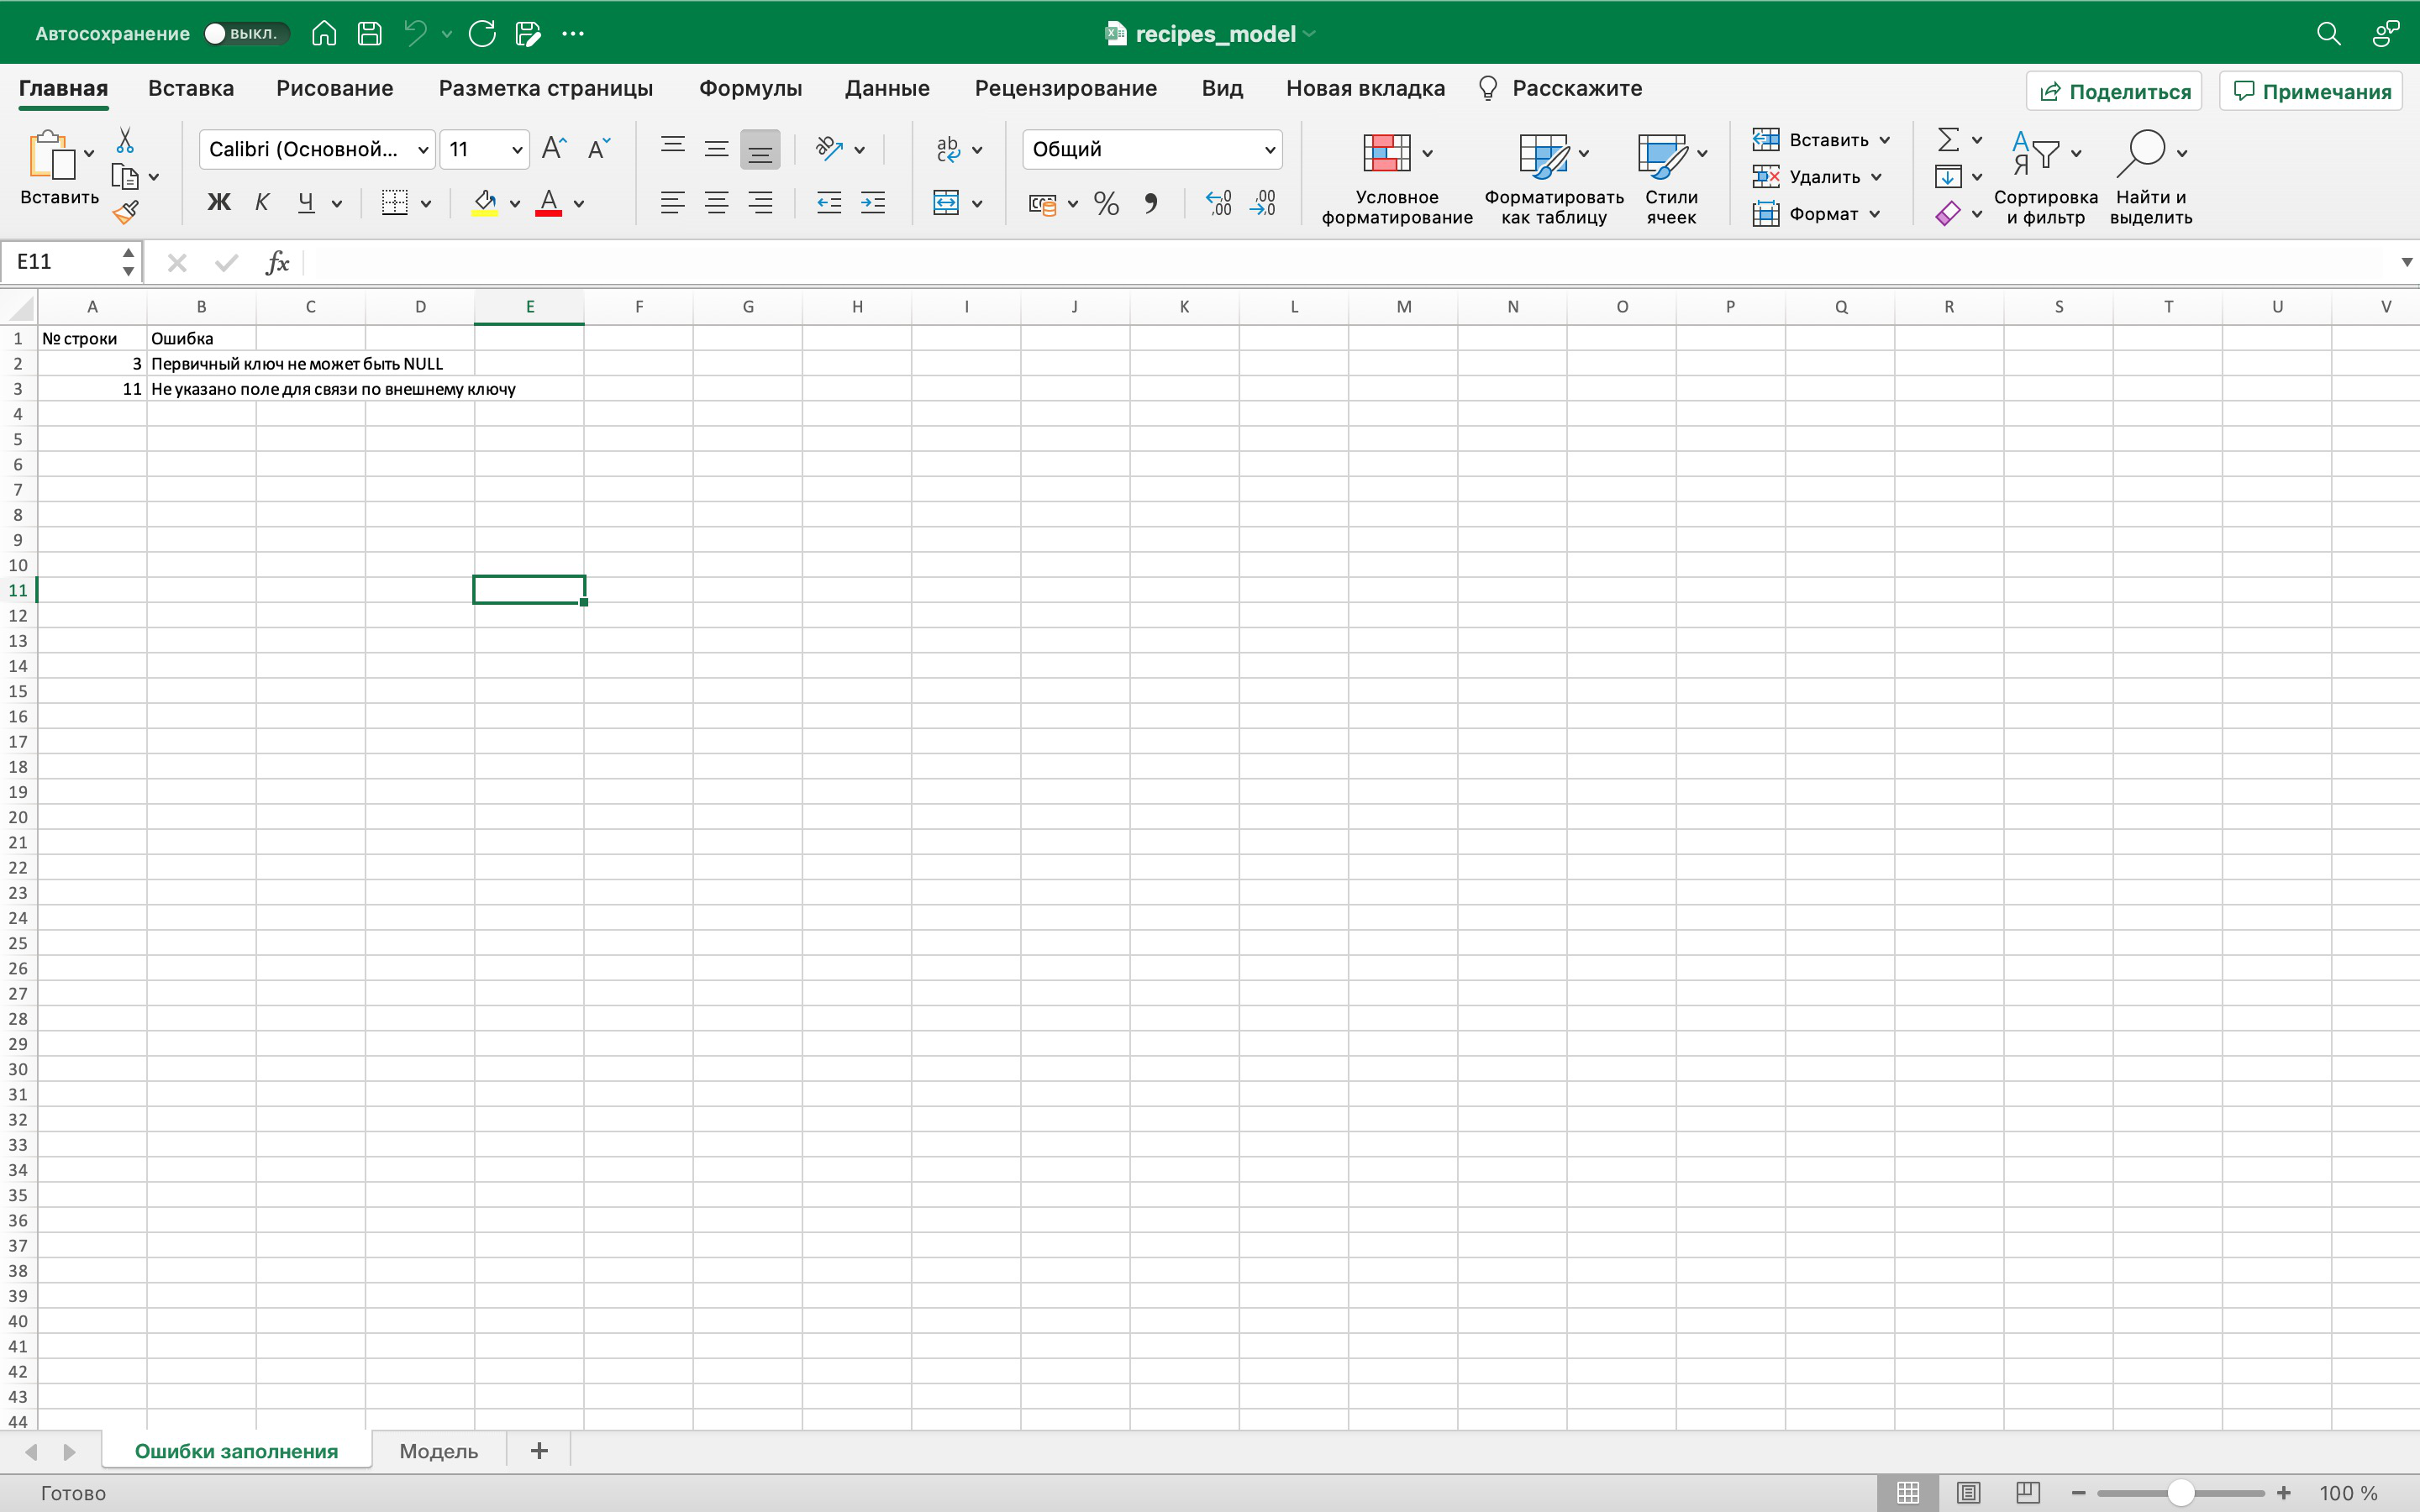

In [241]:
ins(1)

8. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [20]:
group_recipes_model = recipes_model.groupby(['Сущность'])['Атрибут'].count()
group_recipes_model

Сущность
recipe    8
review    6
user      3
Name: Атрибут, dtype: int64

In [21]:
workbook.sheets.add('Статистика')
worksheet_group = workbook.sheets['Статистика']

In [22]:
worksheet_group.range('A1').value = group_recipes_model

In [23]:
import seaborn as sns

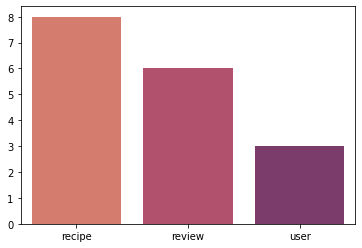

In [24]:
picture_sns = sns.barplot(x=list(group_recipes_model.index), 
                                                y=list(group_recipes_model), palette = 'flare')

In [25]:
picture_sns.get_figure().savefig('my_pic')

In [26]:
worksheet_group.pictures.add(r'/Users/nastya/Desktop/Университет/Tobd/04_tabular/my_pic.png', 
                             left=worksheet_group.range('E10').left)

<Picture 'Picture 2' in <Sheet [recipes_model.xlsx]Статистика>>

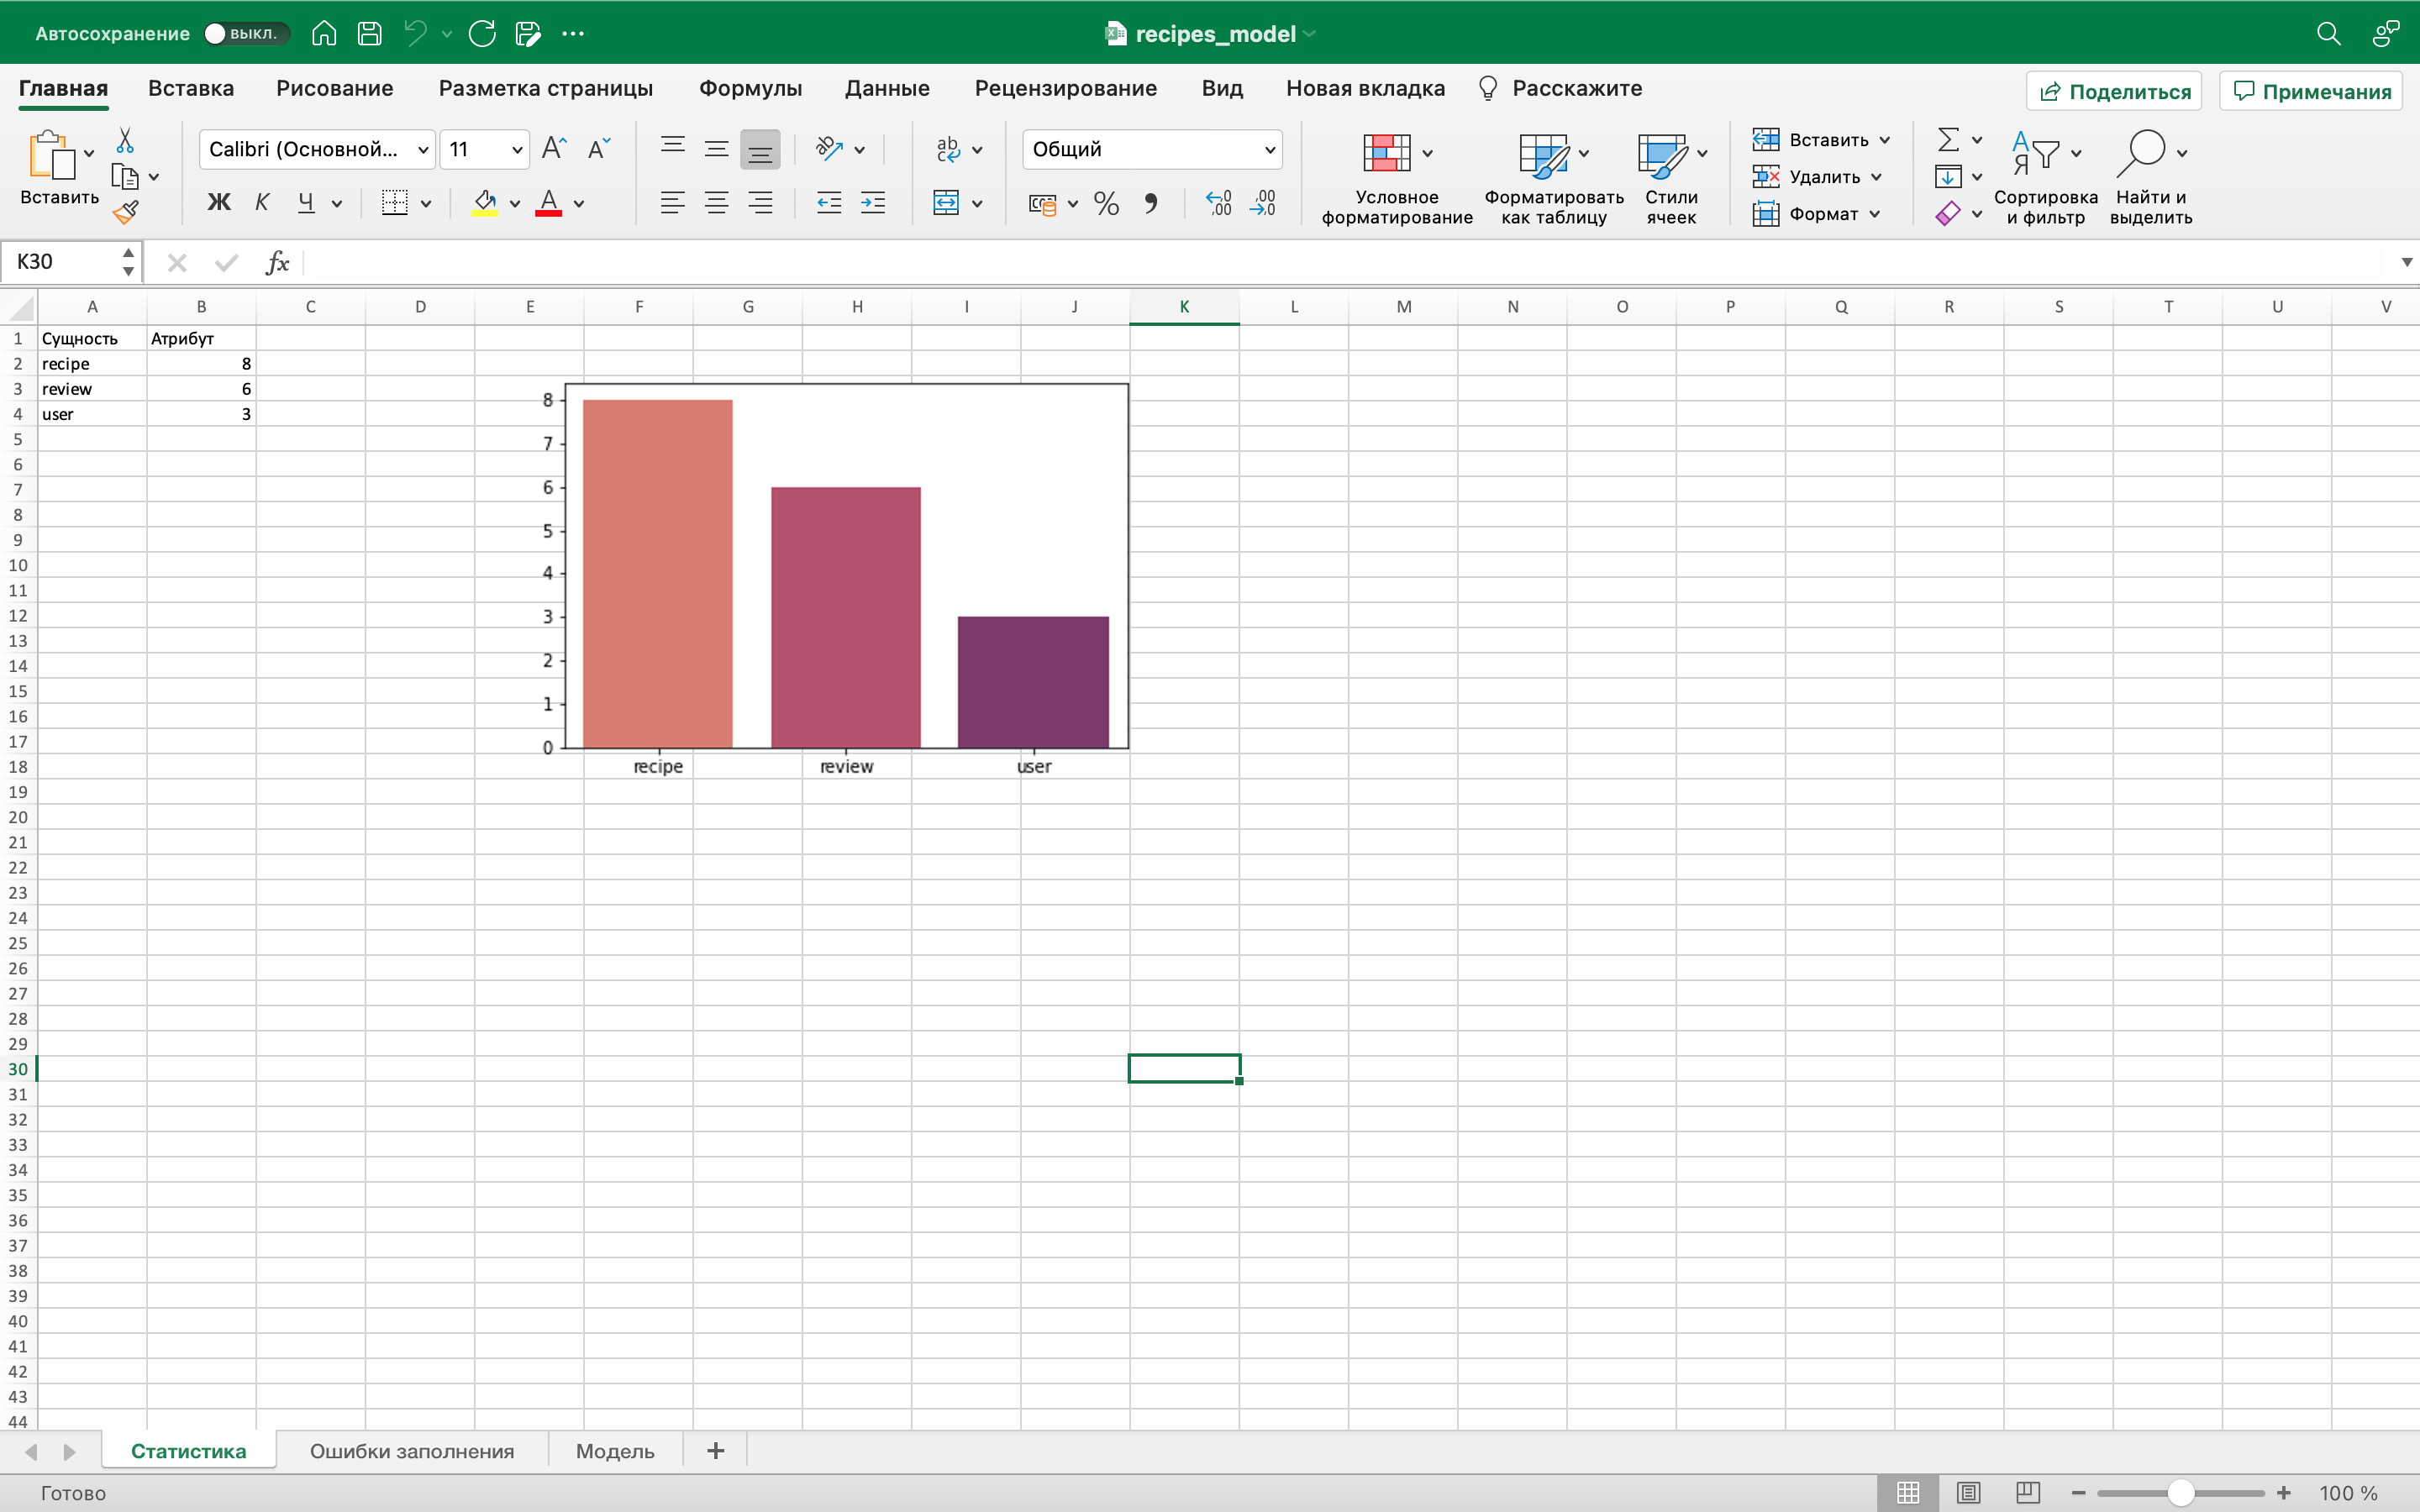

In [297]:
ins(1)

In [298]:
workbook.save()

In [299]:
workbook.close()

In [ ]:
![image-2.png](attachment:image-2.png)